# Wine Quality Classification

Data Source: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

## Data-set Description

The Dataset is related to red variants of the Portuguese "Vinho Verde" wine. It describes the amount of various chemicals present in wine and their effect on it's quality. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). This dataset includes 11 features, 1 label and 1597 records. I chose this dataset as it has multiple features and multiple classes to classify the data into. Quality of the wine is rated from 0 to 10 based on its features and I found it interesting to classify it in 10 classes. Moreover, It also gives me an insight on the way wine quality can be technically evaluated.

My plan with this dataset is to train and test the different classifiers and compare the results for all of those. Finally I will chose the most accurate classifier. In order to classify the quality of wine I would introduce the classifiers with 11 features: fixed acidity, volatile acidity, citric acid, residual sugar, Chlorides, free Sulphur dioxide, total Sulphur dioxide, density, pH, sulphates, alcohol and these will help the algorithm determine the label i.e. quality (score between 0 and 10)

Initially exploring the data and checking where there is necessity for preprocessing. I will pre-process it, normalize the data and visualize it. I will then split the data in training and testing datasets. The classifiers will be trained on the training dataset and tested using the test dataset. Finally I would use the metrics and evaluate my results for all the classifiers used and determine the best performing model.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load Data




In [ ]:
Data=pd.read_csv('WineQT.csv')

In [ ]:
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Step 2: Defining the Problem Statement

The Problem to be solved here is Multi-Class Classification, my label is column quality and my features are fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free Sulphur dioxide, total Sulphur dioxide, density, pH, sulphates and alcohol. The Classifiers that I will be implementing for this are KNN, Logistic Classification, Linear SVC and Perceptron. My Evaluation metric for different classifiers will be Accuracy Score and F1 Score.

## Step 3: Data Encoding and Visualisation

Data Encoding is not needed because all columns are numerical as shown in the result of **Data.info()**


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
Data.isnull().sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

This Command confirms that there are no null values in the Data.

### Data Visualisation

To see the distribution of records in different classes

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


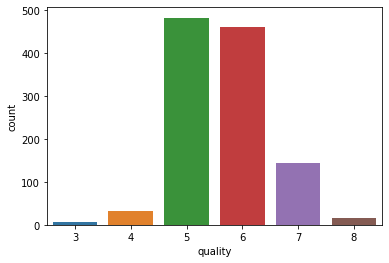

In [ ]:
import seaborn as sbn
sbn.countplot(Data['quality'])

Now we plot all features against each other to check how features are distinguishing between each class.

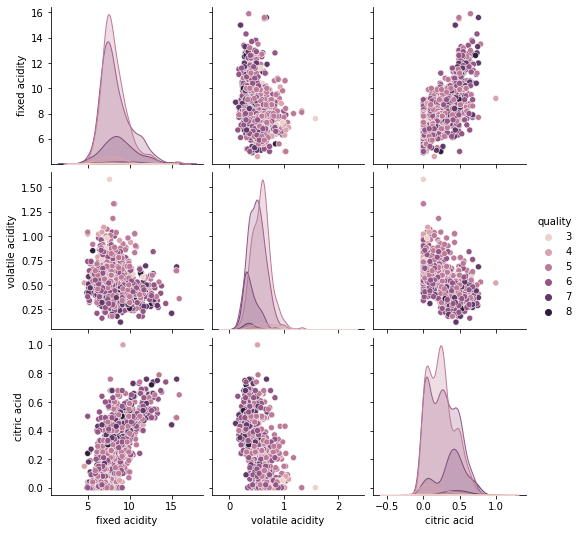

In [ ]:
sbn.pairplot(Data[['fixed acidity','volatile acidity','citric acid','quality']],hue='quality')

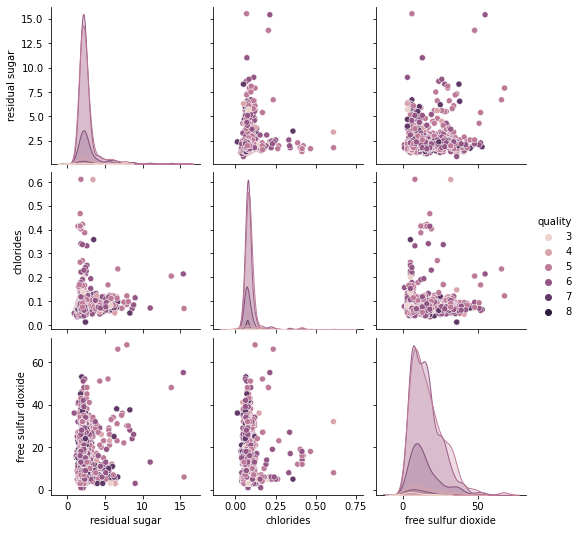

In [ ]:
sbn.pairplot(Data[['residual sugar','chlorides','free sulfur dioxide','quality']],hue='quality')

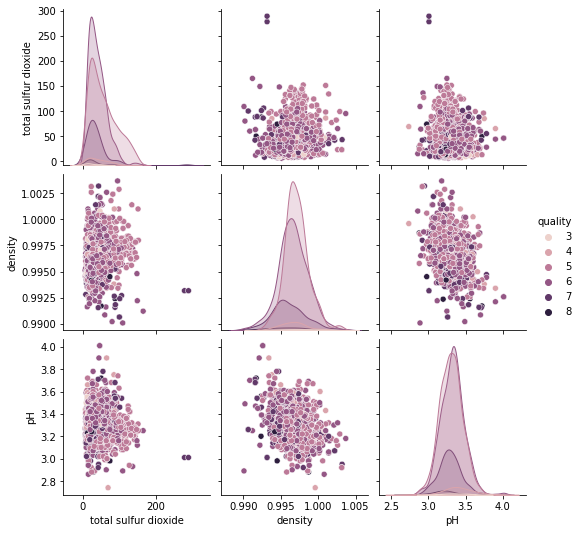

In [ ]:
sbn.pairplot(Data[['total sulfur dioxide','density','pH','quality']],hue='quality')

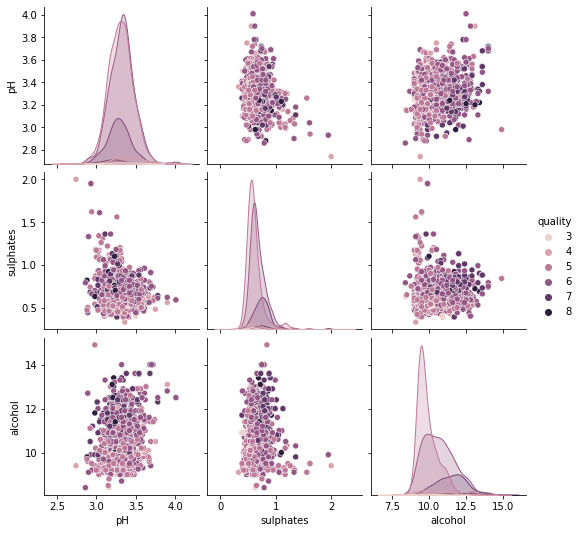

In [ ]:
sbn.pairplot(Data[['pH','sulphates','alcohol','quality']],hue='quality')

Looking at these plots we get to see how these respective features are distributed within the given classes.

## Step 4: Label Analysis

In [ ]:
Data['quality'].value_counts()


5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [ ]:
Data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# Just to confirm there are no records for this class
Data[Data['quality']==9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


In [ ]:
# Just to confirm there are no records for this class
Data[Data['quality']==2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


In [ ]:
# Just to confirm there are no records for this class
Data[Data['quality']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


## Step 5: Data Clean-up

From the visualisation, we can infer following pre-processing:
1] Drop Id column
2] Combine Classes 3-4 , 7-8.
3] Oversampling of the Data so that all classes may have equivalent number of records.
4] Drop Classes 1,2,9,10 as there are no records for these classes. Rename the labels [Label Encoder].

### 1] Drop ID Column

In [ ]:
Data_1 = Data.drop(['Id'], axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
Data_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2] Combine Classes 3-4 and 7-8


In [ ]:
Data_1['quality']=Data_1['quality'].replace(3,4)
Data_1['quality']=Data_1['quality'].replace(8,7)
Data_1['quality'].unique()

array([5, 6, 7, 4])

In [ ]:
Data_1['quality'].value_counts()

5    483
6    462
7    159
4     39
Name: quality, dtype: int64

### 3] Oversampling

In [ ]:
x=Data_1.drop('quality',axis=1)
y=Data_1['quality']

In [ ]:
y.value_counts()

5    483
6    462
7    159
4     39
Name: quality, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [ ]:
y_sm.value_counts()

5    483
4    483
6    462
7    159
Name: quality, dtype: int64

In [ ]:
new_data= pd.concat([x_sm, y_sm], axis=1)

x1=new_data.drop('quality',axis=1)
y1=new_data['quality']

smote = SMOTE(sampling_strategy='minority')
x1_sm, y1_sm = smote.fit_resample(x1,y1)

In [ ]:
y1_sm.value_counts()

5    483
7    483
4    483
6    462
Name: quality, dtype: int64

In [ ]:
new_data1= pd.concat([x1_sm, y1_sm], axis=1)

x2=new_data1.drop('quality',axis=1)
y2=new_data1['quality']

smote = SMOTE(sampling_strategy='minority')
x2_sm, y2_sm = smote.fit_resample(x2,y2)


In [ ]:
y2_sm.value_counts()

5    483
6    483
7    483
4    483
Name: quality, dtype: int64

In [ ]:
Data_Oversample= pd.concat([x2_sm, y2_sm], axis=1)

In [ ]:
Data_Oversample.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
Data_Oversample['quality'].value_counts()

5    483
6    483
7    483
4    483
Name: quality, dtype: int64

### 4] Label Encoding

In [ ]:
from sklearn import preprocessing

Data_Encoded=Data_Oversample.copy()

le = preprocessing.LabelEncoder()

le.fit(Data_Encoded['quality'])

list(le.classes_)

[4, 5, 6, 7]

In [ ]:
le.transform(Data_Encoded['quality'])

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
Data_Encoded['quality']=le.transform(Data_Encoded['quality'])

In [ ]:
Data_Encoded['quality'].unique()

array([1, 2, 3, 0])

**By the end of this Step we have a Pre-Processed Data that has 11 features and 4 classes with 483 records in each class.**

In [ ]:
Final_Data=Data_Encoded.copy()
Final_Data['quality'].head()

0    1
1    1
2    1
3    2
4    1
Name: quality, dtype: int64

In [ ]:
Final_Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
Final_Data['quality'].unique()

array([1, 2, 3, 0])

In [ ]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1932 non-null   float64
 1   volatile acidity      1932 non-null   float64
 2   citric acid           1932 non-null   float64
 3   residual sugar        1932 non-null   float64
 4   chlorides             1932 non-null   float64
 5   free sulfur dioxide   1932 non-null   float64
 6   total sulfur dioxide  1932 non-null   float64
 7   density               1932 non-null   float64
 8   pH                    1932 non-null   float64
 9   sulphates             1932 non-null   float64
 10  alcohol               1932 non-null   float64
 11  quality               1932 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 181.2 KB


### Data Visualisation after Pre-processing

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


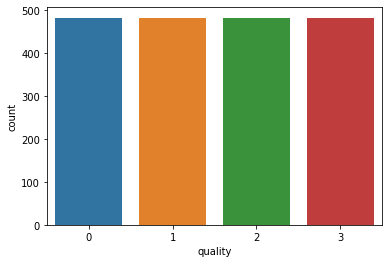

In [ ]:
sbn.countplot(Final_Data['quality'])

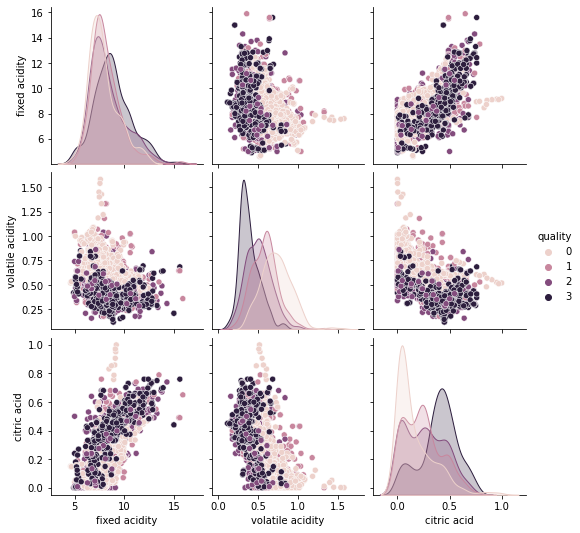

In [ ]:
sbn.pairplot(Final_Data[['fixed acidity','volatile acidity','citric acid','quality']],hue='quality')

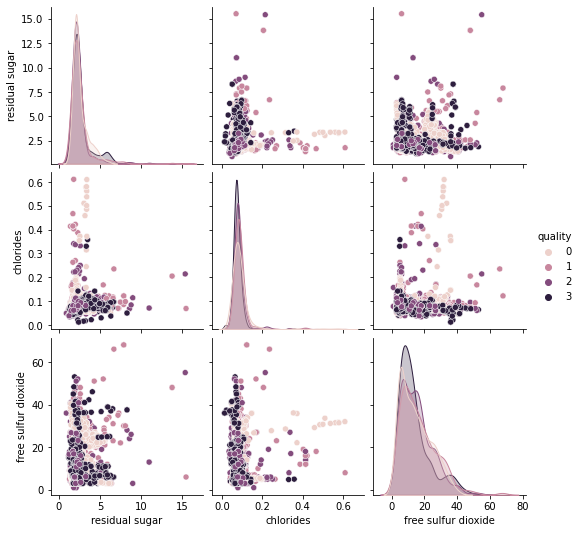

In [ ]:
sbn.pairplot(Final_Data[['residual sugar','chlorides','free sulfur dioxide','quality']],hue='quality')

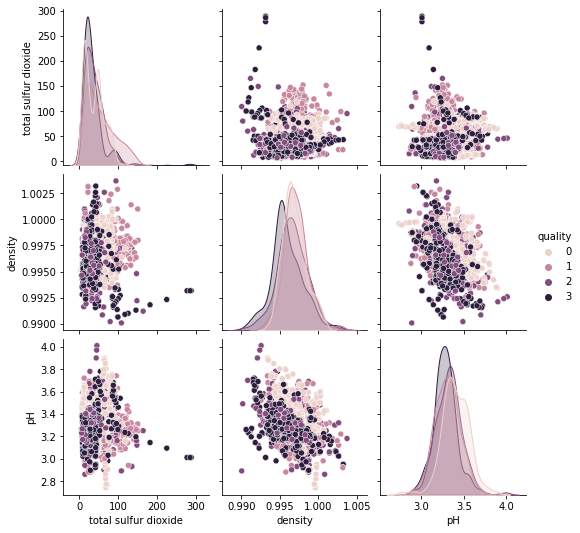

In [ ]:
sbn.pairplot(Final_Data[['total sulfur dioxide','density','pH','quality']],hue='quality')

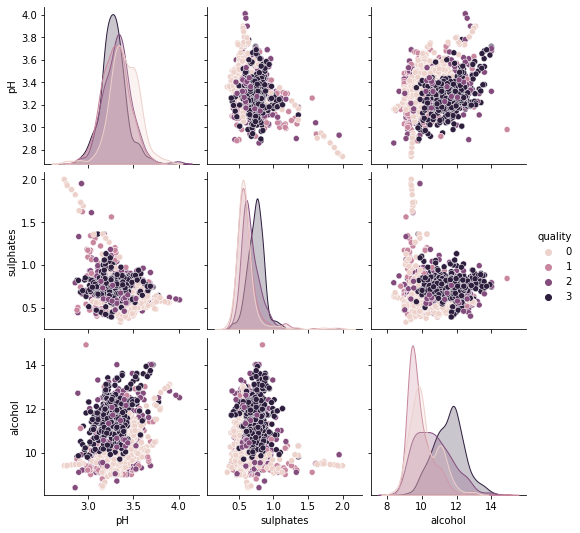

In [ ]:
sbn.pairplot(Final_Data[['pH','sulphates','alcohol','quality']],hue='quality')

These plots show how the respective features are distributed within the given classes after the data has been processed. It helps to confirm that the data pre-processing has worked pretty well.

## Step 6: Normalize Features

In this step, all the features are normalised except the Label "quality"

In [ ]:
from sklearn.preprocessing import StandardScaler

#Separating the features(Parameters) and Label(Quality)

Parameters = Final_Data.drop(['quality'], axis=1)
Label = Final_Data['quality']

scaler=StandardScaler()
scaler.fit(Parameters)
Parameters_normalised=scaler.transform(Parameters)

Parameters_normalised_DF=pd.DataFrame(Parameters_normalised, columns=Parameters.columns)
Label_DF=pd.DataFrame(Final_Data['quality'])


In [ ]:
type(Label)

pandas.core.series.Series

In [ ]:
Parameters_normalised.shape

(1932, 11)

In [ ]:
# This step is done to confirm that the normalisation has been perfromed correctly.

round(Parameters_normalised_DF['fixed acidity'].mean())+round(Parameters_normalised_DF['chlorides'].mean())==0

True

In [ ]:
Parameters_normalised_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1932 non-null   float64
 1   volatile acidity      1932 non-null   float64
 2   citric acid           1932 non-null   float64
 3   residual sugar        1932 non-null   float64
 4   chlorides             1932 non-null   float64
 5   free sulfur dioxide   1932 non-null   float64
 6   total sulfur dioxide  1932 non-null   float64
 7   density               1932 non-null   float64
 8   pH                    1932 non-null   float64
 9   sulphates             1932 non-null   float64
 10  alcohol               1932 non-null   float64
dtypes: float64(11)
memory usage: 166.2 KB


In [ ]:
Label_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  1932 non-null   int64
dtypes: int64(1)
memory usage: 15.2 KB


## Step 7: Correlation Plot



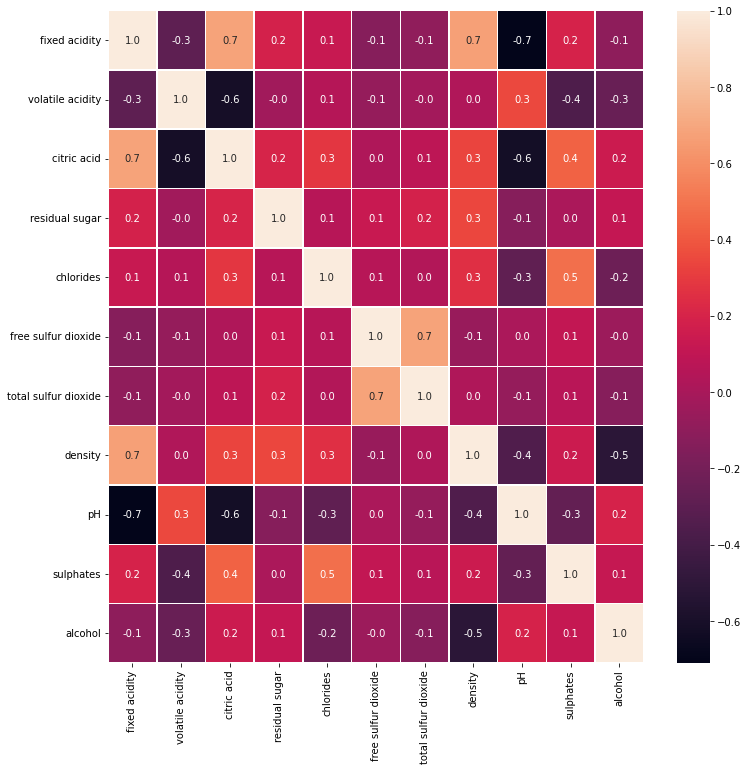

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sbn.heatmap(Parameters_normalised_DF.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Step 8: Data Split-Up

In [ ]:
from sklearn.model_selection import train_test_split

Feature_train, Feature_test, Label_train, Label_test = train_test_split(Parameters_normalised, Label, test_size=0.3, random_state=5)

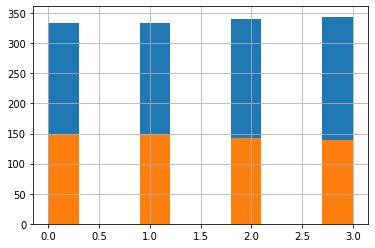

In [ ]:
Label_train.hist()
Label_test.hist()

## Step 9: Classification Tools

### **9.1 Supervised Learning**

#### 9.1.1 KNN

[K = 2,3,4,5]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy_list=[]
f1_score_list=[]

for k in [2,3,4,5,6,7,8,9,10]:
  modelKNN = KNeighborsClassifier(n_neighbors=k)
  modelKNN.fit(Feature_train, Label_train)
  Label_test_predict_knn=modelKNN.predict(Feature_test)

  accuracy_list.append(accuracy_score(Label_test,Label_test_predict_knn))
  f1_score_list.append(f1_score(Label_test,Label_test_predict_knn,average='weighted'))

print (accuracy_list, f1_score_list)

[0.7155172413793104, 0.7120689655172414, 0.7086206896551724, 0.6948275862068966, 0.6827586206896552, 0.6810344827586207, 0.6741379310344827, 0.6758620689655173, 0.6689655172413793] [0.7019102896303041, 0.6950231621859256, 0.691469274258573, 0.6756192279939454, 0.6621586137429456, 0.6613737264365278, 0.6541449497678236, 0.6529016484194462, 0.6481641113664464]


Plot to clarify which value of k to finalise

Text(0.5, 1.0, 'Evaluation metrics vs. K')

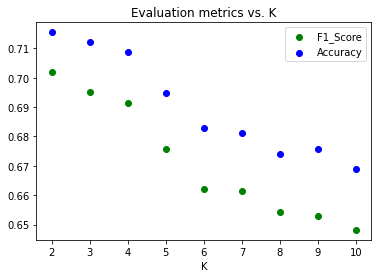

In [ ]:
plt.scatter(range(2,11),f1_score_list,label='F1_Score',color='green')
plt.scatter(range(2,11),accuracy_list,label='Accuracy',color='blue')
plt.xlabel('K')
plt.legend()
plt.title('Evaluation metrics vs. K')

Thus we use k=2 for best results

##### K=2

In [ ]:
KNN_Model_2 = KNeighborsClassifier(n_neighbors=2)
KNN_Model_2.fit(Feature_train, Label_train)
Label_test_predicted_2nn=KNN_Model_2.predict(Feature_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


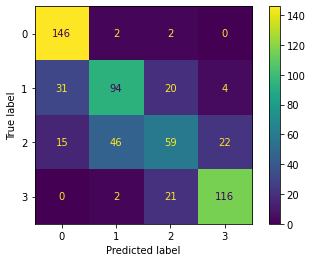

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN_Model_2,Feature_test,Label_test)

In [ ]:
print('KNN result [k=2]: Test Data')
print('Accuracy: ',accuracy_score(Label_test,Label_test_predicted_2nn))
print('f1_score: ', f1_score(Label_test,Label_test_predicted_2nn,average='weighted'))
print('Precision: ', precision_score(Label_test,Label_test_predicted_2nn,average='weighted'))
print('Recall: ', recall_score(Label_test,Label_test_predicted_2nn,average='weighted'))
print()

KNN result [k=2]: Test Data
Accuracy:  0.7155172413793104
f1_score:  0.7019102896303041
Precision:  0.7017464475267199
Recall:  0.7155172413793104



In [ ]:
KNN_Model_3 = KNeighborsClassifier(n_neighbors=3)
KNN_Model_3.fit(Feature_train, Label_train)
Label_test_predicted_3nn=KNN_Model_3.predict(Feature_test)

In [ ]:
print('KNN result [k=3]: Test Data')
print('Accuracy: ',accuracy_score(Label_test,Label_test_predicted_3nn))
print('f1_score: ', f1_score(Label_test,Label_test_predicted_3nn,average='weighted'))
print('Precision: ', precision_score(Label_test,Label_test_predicted_3nn,average='weighted'))
print('Recall: ', recall_score(Label_test,Label_test_predicted_3nn,average='weighted'))
print()

KNN result [k=3]: Test Data
Accuracy:  0.7120689655172414
f1_score:  0.6950231621859256
Precision:  0.6977505188502003
Recall:  0.7120689655172414



##### K=4

In [ ]:
KNN_Model_4 = KNeighborsClassifier(n_neighbors=4)
KNN_Model_4.fit(Feature_train, Label_train)
Label_test_predicted_4nn=KNN_Model_4.predict(Feature_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


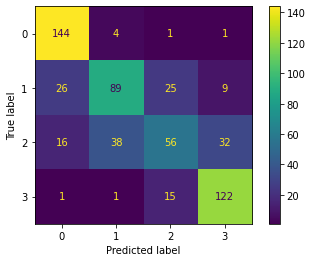

In [ ]:
plot_confusion_matrix(KNN_Model_4,Feature_test,Label_test)

In [ ]:
print('KNN result [k=4]: Test Data')
print('Accuracy: ',accuracy_score(Label_test,Label_test_predicted_4nn))
print('f1_score: ', f1_score(Label_test,Label_test_predicted_4nn,average='weighted'))
print('Precision: ', precision_score(Label_test,Label_test_predicted_4nn,average='weighted'))
print('Recall: ', recall_score(Label_test,Label_test_predicted_4nn,average='weighted'))
print()

KNN result [k=4]: Test Data
Accuracy:  0.7086206896551724
f1_score:  0.691469274258573
Precision:  0.6919861432244565
Recall:  0.7086206896551724



#### 9.1.2 Logistic Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticRegression_Model= LogisticRegression(class_weight='balanced', max_iter=500)
LogisticRegression_Model.fit(Feature_train, Label_train)

Label_test_Predicted_LR=LogisticRegression_Model.predict(Feature_test)
Label_train_Predicted_LR=LogisticRegression_Model.predict(Feature_train)

In [ ]:
print('Logistic Classification result: Test Data')
print('Accuracy: ',accuracy_score(Label_test,Label_test_Predicted_LR))
print('f1_score: ', f1_score(Label_test,Label_test_Predicted_LR,average='weighted'))
print('Precision: ', precision_score(Label_test,Label_test_Predicted_LR,average='weighted'))
print('Recall: ', recall_score(Label_test,Label_test_Predicted_LR,average='weighted'))
print()
print('Logistic Classification result: Training Data')
print('Accuracy: ',accuracy_score(Label_train,Label_train_Predicted_LR))
print('f1_score: ', f1_score(Label_train,Label_train_Predicted_LR,average='weighted'))
print('Precision: ', precision_score(Label_train,Label_train_Predicted_LR,average='weighted'))
print('Recall: ', recall_score(Label_train,Label_train_Predicted_LR,average='weighted'))

Logistic Classification result: Test Data
Accuracy:  0.5948275862068966
f1_score:  0.5889484172192297
Precision:  0.5859251737816084
Recall:  0.5948275862068966

Logistic Classification result: Training Data
Accuracy:  0.606508875739645
f1_score:  0.601494074026367
Precision:  0.5991239791368346
Recall:  0.606508875739645


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Label_test, Label_test_Predicted_LR))
print(classification_report(Label_train, Label_train_Predicted_LR))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       150
           1       0.59      0.55      0.57       149
           2       0.42      0.37      0.39       142
           3       0.66      0.75      0.70       139

    accuracy                           0.59       580
   macro avg       0.59      0.59      0.59       580
weighted avg       0.59      0.59      0.59       580

              precision    recall  f1-score   support

           0       0.65      0.70      0.68       333
           1       0.59      0.56      0.57       334
           2       0.47      0.41      0.44       341
           3       0.68      0.75      0.72       344

    accuracy                           0.61      1352
   macro avg       0.60      0.61      0.60      1352
weighted avg       0.60      0.61      0.60      1352



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


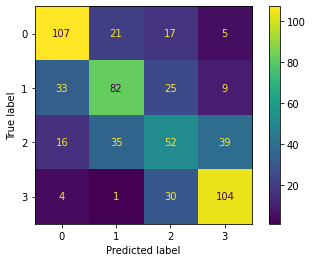

In [ ]:
plot_confusion_matrix(LogisticRegression_Model,Feature_test,Label_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


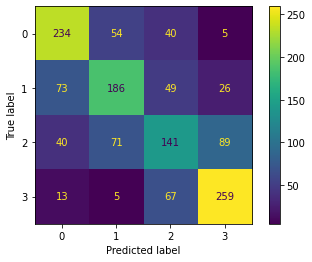

In [ ]:
plot_confusion_matrix(LogisticRegression_Model,Feature_train,Label_train)

#### 9.1.3 Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(max_iter=8000)
svc_model.fit(Feature_train, Label_train)
svc_model_prediction=svc_model.predict(Feature_test)

In [ ]:
print('Linear SVC result:')
print('Accuracy: ',accuracy_score(Label_test,svc_model_prediction))
print('f1_score: ', f1_score(Label_test,svc_model_prediction,average='weighted'))
print('Precision: ', precision_score(Label_test,svc_model_prediction,average='weighted'))
print('Recall: ', recall_score(Label_test,svc_model_prediction,average='weighted'))

Linear SVC result:
Accuracy:  0.6051724137931035
f1_score:  0.5815103933389878
Precision:  0.5845761944887011
Recall:  0.6051724137931035


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


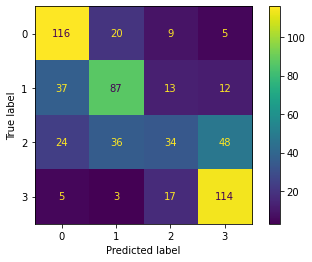

In [ ]:
plot_confusion_matrix(svc_model,Feature_test,Label_test)

#### 9.1.4 Perceptron

##### No Hidden Layers

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(),max_iter=1000)
MLP.fit(Feature_train, Label_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=1000,
              solver='sgd')

In [ ]:
MLP_Predicted=MLP.predict(Feature_test)

In [ ]:
print('Supervised_MLP result:')
print('Accuracy: ',accuracy_score(Label_test,MLP_Predicted))
print('f1_score: ', f1_score(Label_test,MLP_Predicted,average='weighted'))
print('Precision: ', precision_score(Label_test,MLP_Predicted,average='weighted'))
print('Recall: ', recall_score(Label_test,MLP_Predicted,average='weighted'))

Supervised_MLP result:
Accuracy:  0.5827586206896552
f1_score:  0.5697814365464904
Precision:  0.5670797777025489
Recall:  0.5827586206896552


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


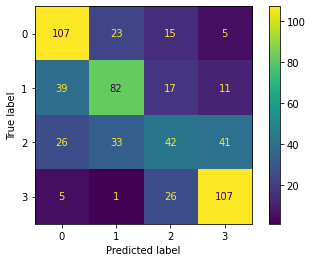

In [ ]:
plot_confusion_matrix(MLP,Feature_test,Label_test)

##### Adding Two Hidden Layers

In [ ]:
MLP_H = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(200,100),max_iter=80000, random_state=10, learning_rate='constant', learning_rate_init=0.001)
MLP_H.fit(Feature_train, Label_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(200, 100),
              max_iter=80000, random_state=10, solver='lbfgs')

In [ ]:
MLP_H_Predicted=MLP_H.predict(Feature_test)

In [ ]:
print('Supervised_MLP result:')
print('Accuracy: ',accuracy_score(Label_test,MLP_H_Predicted))
print('f1_score: ', f1_score(Label_test,MLP_H_Predicted,average='weighted'))
print('Precision: ', precision_score(Label_test,MLP_H_Predicted,average='weighted'))
print('Recall: ', recall_score(Label_test,MLP_H_Predicted,average='weighted'))

Supervised_MLP result:
Accuracy:  0.7586206896551724
f1_score:  0.7578072661970713
Precision:  0.7605232730785643
Recall:  0.7586206896551724


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


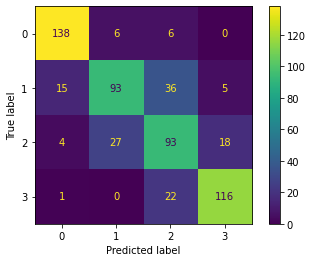

In [ ]:
plot_confusion_matrix(MLP_H,Feature_test,Label_test)

### **9.2 Unsupervised-Supervised Learning**

#### 9.2.1 Self Organizing Map [SOM]

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=4f55aeaab37a5f76226358cb0e29703ffdb83ec193b1354fdf08a593a792bc98
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [ ]:
from minisom import MiniSom

In [ ]:
SOM_Model=MiniSom(32,32,11,sigma=0.8, learning_rate=0.8)
SOM_Model.train(Feature_train,150000, verbose=True)

 [ 150000 / 150000 ] 100% - 0:00:00 left 
 quantization error: 0.2700721635700724


In [ ]:
SOM_Model.quantization_error(Feature_train)

0.2700721635700724

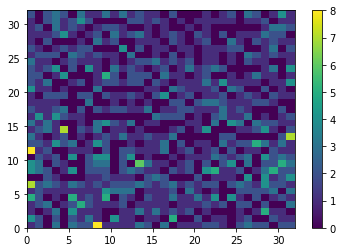

In [ ]:
activation=SOM_Model.activation_response(Feature_train)
plt.pcolor(activation.T)
plt.colorbar()
plt.show()

In [ ]:
Feature_train_qnt=SOM_Model.quantization(Feature_train)

#### 9.2.2 KNN 2nd Layer

[K = 2,3,4,5]

In [ ]:
accuracy_list2=[]
f1_score_list2=[]

for k in [2,3,4,5,6,7,8,9,10]:
  modelKNN2 = KNeighborsClassifier(n_neighbors=k)
  modelKNN2.fit(Feature_train_qnt, Label_train)
  Label_test_predict_knn2=modelKNN2.predict(SOM_Model.quantization(Feature_test))

  accuracy_list2.append(accuracy_score(Label_test,Label_test_predict_knn2))
  f1_score_list2.append(f1_score(Label_test,Label_test_predict_knn2,average='weighted'))

print (accuracy_list2, f1_score_list2)

[0.7051724137931035, 0.7, 0.6896551724137931, 0.6931034482758621, 0.6758620689655173, 0.6689655172413793, 0.6551724137931034, 0.6379310344827587, 0.6362068965517241] [0.6927370699368709, 0.6825478199264748, 0.673107252960826, 0.6763761705048026, 0.6574339555488621, 0.649905886648054, 0.6357323230193882, 0.6174694214354617, 0.6169260487785896]


Text(0.5, 1.0, 'Evaluation metrics vs. K')

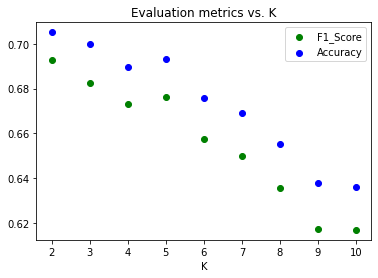

In [ ]:
plt.scatter(range(2,11),f1_score_list2,label='F1_Score',color='green')
plt.scatter(range(2,11),accuracy_list2,label='Accuracy',color='blue')
plt.xlabel('K')
plt.legend()
plt.title('Evaluation metrics vs. K')

##### K=2

In [ ]:
KNN_Model2_2 = KNeighborsClassifier(n_neighbors=2)
KNN_Model2_2.fit(Feature_train_qnt, Label_train)
Label_test_predicted_2nn2=KNN_Model2_2.predict(Feature_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


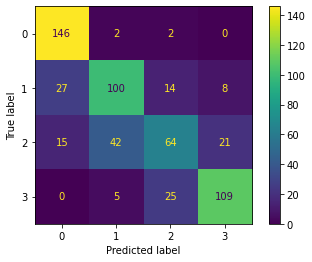

In [ ]:
plot_confusion_matrix(KNN_Model2_2,Feature_test,Label_test)

In [ ]:
print('KNN2 result [k=2]: Test Data')
print('Accuracy: ',accuracy_score(Label_test,Label_test_predicted_2nn2))
print('f1_score: ', f1_score(Label_test,Label_test_predicted_2nn2,average='weighted'))
print('Precision: ', precision_score(Label_test,Label_test_predicted_2nn2,average='weighted'))
print('Recall: ', recall_score(Label_test,Label_test_predicted_2nn2,average='weighted'))
print()

KNN2 result [k=2]: Test Data
Accuracy:  0.7224137931034482
f1_score:  0.7113212847517847
Precision:  0.711778616770642
Recall:  0.7224137931034482



##### K=5

In [ ]:
KNN_Model2_5 = KNeighborsClassifier(n_neighbors=5)
KNN_Model2_5.fit(Feature_train_qnt, Label_train)
Label_test_predicted_5nn2=KNN_Model2_5.predict(Feature_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


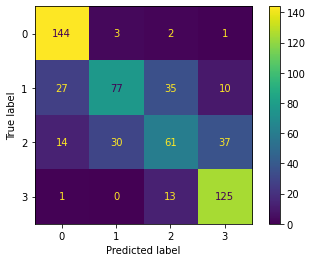

In [ ]:
plot_confusion_matrix(KNN_Model2_5,Feature_test,Label_test)

In [ ]:
print('KNN2 result [k=5]: Test Data')
print('Accuracy: ',accuracy_score(Label_test,Label_test_predicted_5nn2))
print('f1_score: ', f1_score(Label_test,Label_test_predicted_5nn2,average='weighted'))
print('Precision: ', precision_score(Label_test,Label_test_predicted_5nn2,average='weighted'))
print('Recall: ', recall_score(Label_test,Label_test_predicted_5nn2,average='weighted'))
print()

KNN2 result [k=5]: Test Data
Accuracy:  0.7017241379310345
f1_score:  0.6845147182665923
Precision:  0.6877561970787264
Recall:  0.7017241379310345



#### 9.2.3 Logistic Classification 2nd Layer

In [ ]:
LGR_model_2nd_layer = LogisticRegression(max_iter=1000)
LGR_model_2nd_layer.fit(Feature_train_qnt,Label_train)
LGR_model_2nd_layer_prediction=LGR_model_2nd_layer.predict(SOM_Model.quantization(Feature_test))

In [ ]:
print('SOM_LGC result:')
print('Accuracy: ',accuracy_score(Label_test,LGR_model_2nd_layer_prediction))
print('f1_score: ', f1_score(Label_test,LGR_model_2nd_layer_prediction,average='weighted'))
print('Precision: ', precision_score(Label_test,LGR_model_2nd_layer_prediction,average='weighted'))
print('Recall: ', recall_score(Label_test,LGR_model_2nd_layer_prediction,average='weighted'))

SOM_LGC result:
Accuracy:  0.5741379310344827
f1_score:  0.5712059178181949
Precision:  0.5699792182887476
Recall:  0.5741379310344827


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


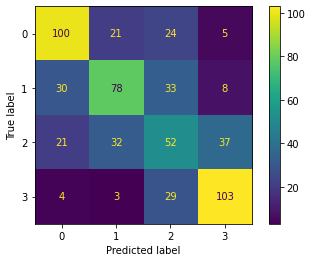

In [ ]:
plot_confusion_matrix(LGR_model_2nd_layer,SOM_Model.quantization(Feature_test),Label_test)

#### 9.3.4 Linear SVC 2nd Layer

In [ ]:
svc_model2 = LinearSVC(max_iter=8000)
svc_model2.fit(Feature_train_qnt, Label_train)
svc_model2_prediction=svc_model2.predict(Feature_test)

In [ ]:
print('SOM_SVC result:')
print('Accuracy: ',accuracy_score(Label_test,svc_model2_prediction))
print('f1_score: ', f1_score(Label_test,svc_model2_prediction,average='weighted'))
print('Precision: ', precision_score(Label_test,svc_model2_prediction,average='weighted'))
print('Recall: ', recall_score(Label_test,svc_model2_prediction,average='weighted'))

SOM_SVC result:
Accuracy:  0.603448275862069
f1_score:  0.5785399112418325
Precision:  0.5840811148585833
Recall:  0.603448275862069


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


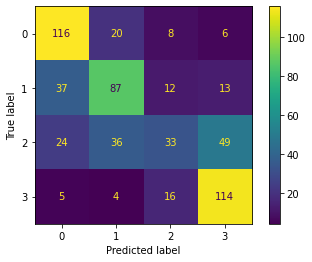

In [ ]:
plot_confusion_matrix(svc_model2,Feature_test,Label_test)

#### 9.3.5 Perceptron 2nd Layer

##### No Hidden Layer

In [ ]:
MLP2_0 = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(),max_iter=80000, random_state=10, learning_rate='constant', learning_rate_init=0.001)
MLP2_0.fit(Feature_train_qnt, Label_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=80000,
              random_state=10, solver='lbfgs')

In [ ]:
MLP2_0_Predicted=MLP2_0.predict(Feature_test)

In [ ]:
print('SOM_MLP No Hidden Layer result:')
print('Accuracy: ',accuracy_score(Label_test,MLP2_0_Predicted))
print('f1_score: ', f1_score(Label_test,MLP2_0_Predicted,average='weighted'))
print('Precision: ', precision_score(Label_test,MLP2_0_Predicted,average='weighted'))
print('Recall: ', recall_score(Label_test,MLP2_0_Predicted,average='weighted'))

SOM_MLP No Hidden Layer result:
Accuracy:  0.5879310344827586
f1_score:  0.5815930145934963
Precision:  0.578329414112177
Recall:  0.5879310344827586


##### Adding two Hidden Layers

In [ ]:
MLP2_H = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(200,100),max_iter=80000, random_state=10, learning_rate='constant', learning_rate_init=0.001)
MLP2_H.fit(Feature_train_qnt, Label_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(200, 100),
              max_iter=80000, random_state=10, solver='lbfgs')

In [ ]:
MLP2_H_Predicted=MLP2_H.predict(Feature_test)

In [ ]:
print('SOM_MLP Two Hidden Layers result:')
print('Accuracy: ',accuracy_score(Label_test,MLP2_H_Predicted))
print('f1_score: ', f1_score(Label_test,MLP2_H_Predicted,average='weighted'))
print('Precision: ', precision_score(Label_test,MLP2_H_Predicted,average='weighted'))
print('Recall: ', recall_score(Label_test,MLP2_H_Predicted,average='weighted'))

SOM_MLP Two Hidden Layers result:
Accuracy:  0.7327586206896551
f1_score:  0.7326357506374728
Precision:  0.7354429560722239
Recall:  0.7327586206896551


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


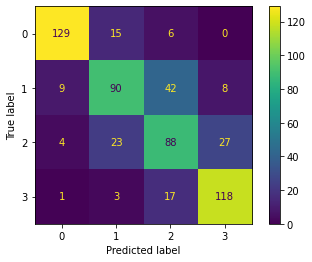

In [ ]:
plot_confusion_matrix(MLP2_H,Feature_test,Label_test)

## Step 10: Conclusion

For this Dataset Supervised Multi-layer Perceptron with two hidden layers gives best results. Comparison of Accuracy score and F1 Score can be found below:

In [ ]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image

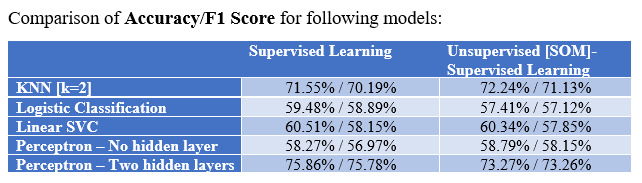

In [ ]:
Table = Image.open("Table.jpg")
Accuracy_Score_Chart = Image.open("A_Chart.jpeg")
F1_Score_Chart = Image.open("F1_Chart.jpeg")
Table

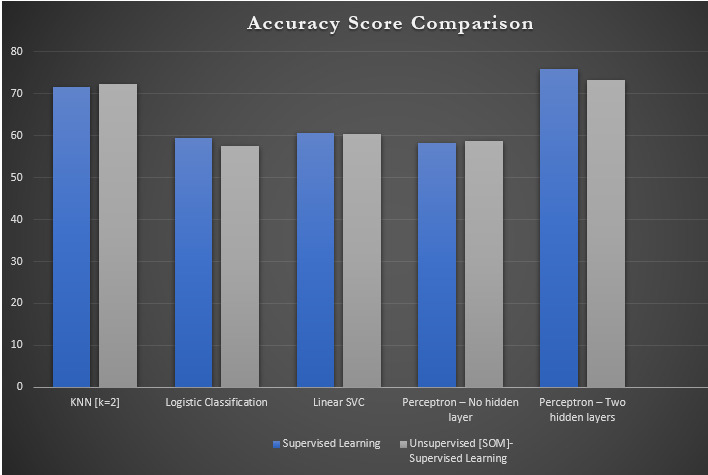

In [ ]:
Accuracy_Score_Chart

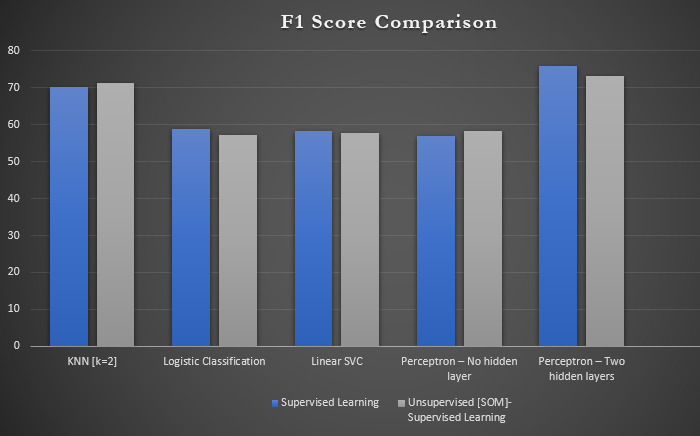

In [ ]:
F1_Score_Chart